In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pathlib

In [92]:
base = pathlib.Path("/Volumes/Transcend/ASOdata/swe_data/50m_clipped_to_east")
dem_base = pathlib.Path("/Volumes/Transcend/ASOdata/DEMs")

In [97]:
dem = xr.open_rasterio(dem_base.joinpath("3mdem_upsample_50m_clipped_to_east.tif"))

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

In [59]:
ds = xr.open_rasterio(base.joinpath("ASO_50M_SWE_USCOGE_20190407_clipped_nobuffer.tif"))

In [60]:
ds.

SyntaxError: invalid syntax (<ipython-input-60-5fc19e5a66ca>, line 1)

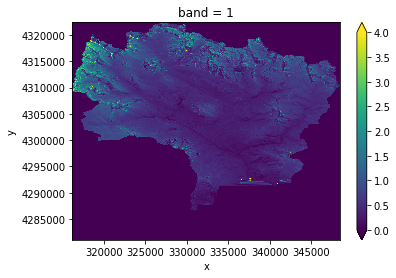

In [61]:
ds.plot(vmin=0, vmax=4)

In [75]:
east_river_area_m2 = 748983000.0 # m2
unit_size = 50*50
snow_storage_cubic = ds.where(ds>=.0001).sum()*unit_size # m3 of snow storage...

# dsflat = ds.values.flatten()
# dsflat[dsflat > .001].shape


In [76]:
snow_cov_area_m2 = ds.values[np.where(ds.values > .0001)].size*50*50

In [80]:
snow_avg_mm = (snow_storage_cubic/snow_cov_area_m2).values * 1000

In [81]:
snow_avg_mm

642.4811315289861

In [111]:
flat_dem = dem.values.flatten()
flat_ds = ds.values.flatten()


In [115]:
foo_dem = flat_dem[flat_dem>0]

In [116]:
foo_ds = flat_ds[flat_dem>0]

(0, 4)

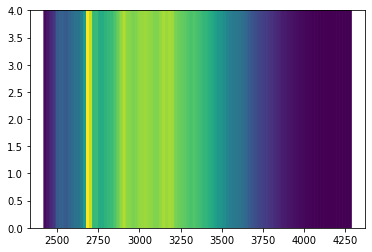

In [122]:
plt.hexbin(foo_dem, foo_ds)
plt.ylim(0,4)

In [120]:
plt.ylim

<function matplotlib.pyplot.ylim(*args, **kwargs)>